In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def substring_after_delim(s, delim):
    return s.partition(delim)[2]

def result_parser(path_to_file_result):
    n_threads_lst = []
    matrixsize_lst = []
    compute_iters_lst = []
    sec_iter_lst = []
    GFLOPS_lst = []
    result_lst = []
 
    with open(path_to_file_result) as output:
        for line in output:
            s = substring_after_delim(line, ': ')
            if 'OpenMP threads' in line:
                n_threads_lst.append(s[:-1])
            if 'Matrix size' in line:
                matrixsize_lst.append(s[:-1])
            if 'Compute iters' in line:
                compute_iters_lst.append(s[:-1])
            if 'Sec/iter' in line:
                sec_iter_lst.append(s[:-1])
            if 'GFLOPS' in line:
                GFLOPS_lst.append(s[:-1])
                
    df = pd.DataFrame()
    df['threads'] = pd.Series(n_threads_lst)
    df['matrix_size'] = pd.Series(matrixsize_lst)
    df['iters'] = pd.Series(compute_iters_lst)
    df['sec_iter'] = pd.Series(sec_iter_lst)
    df['GFLOPS'] = pd.Series(GFLOPS_lst)
    
    df['matrix_size'] = df['matrix_size'].replace(['(500x500)X(500x500)'],'500')
    df['matrix_size'] = df['matrix_size'].replace(['(1000x1000)X(1000x1000)'],'1000')
    df['matrix_size'] = df['matrix_size'].replace(['(1500x1500)X(1500x1500)'],'1500')
    
    df.threads = df.threads.astype(int)
    df.matrix_size = df.matrix_size.astype(int)
    df.iters = df.iters.astype(int)
    df.sec_iter = df.sec_iter.astype(float)
    df.GFLOPS = df.GFLOPS.astype(float)
    
    return df

# Results on OpenMP_v1, OpenMP_v2, OpenBLAS

In [3]:
df_OpenMP_v1 = result_parser('./OpenMP_v1/file_result')
df_OpenMP_v2 = result_parser('./OpenMP_v2/file_result')
df_OpenBLAS = result_parser('./OpenBLAS/file_result')

In [4]:
df_OpenMP_v1

,threads,matrix_size,iters,sec_iter,GFLOPS
0,1,500,10,0.151724,1.647730e+09
1,1,1000,10,1.258990,1.588570e+09
2,1,1500,10,7.515200,8.981800e+08
3,2,500,10,0.071416,3.500610e+09
4,2,1000,10,0.714578,2.798860e+09
5,2,1500,10,3.260510,2.070230e+09
6,4,500,10,0.034869,7.169760e+09
7,4,1000,10,0.302951,6.601730e+09
8,4,1500,10,1.460800,4.620760e+09
9,16,500,10,0.011308,2.210880e+10


In [5]:
df_OpenMP_v2

,threads,matrix_size,iters,sec_iter,GFLOPS
0,1,500,10,0.240776,1.038310e+09
1,1,1000,10,1.642700,1.217510e+09
2,1,1500,10,8.512440,7.929570e+08
3,2,500,10,0.133978,1.865980e+09
4,2,1000,10,1.263220,1.583250e+09
5,2,1500,10,3.846910,1.754660e+09
6,4,500,10,0.067047,3.728730e+09
7,4,1000,10,0.418947,4.773870e+09
8,4,1500,10,1.684420,4.007310e+09
9,16,500,10,0.026550,9.416080e+09


In [6]:
df_OpenBLAS

,threads,matrix_size,iters,sec_iter,GFLOPS
0,1,500,10,0.003946,6.335280e+10
1,1,1000,10,0.026636,7.508720e+10
2,1,1500,10,0.091247,7.397500e+10
3,2,500,10,0.001929,1.296330e+11
4,2,1000,10,0.014620,1.367970e+11
5,2,1500,10,0.045011,1.499620e+11
6,4,500,10,0.000878,2.846620e+11
7,4,1000,10,0.007349,2.721370e+11
8,4,1500,10,0.018530,3.642770e+11
9,16,500,10,0.000682,3.663080e+11


# Plots: Threads, sec_iter

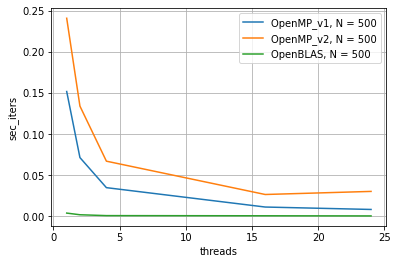

In [7]:
plt.plot(df_OpenMP_v1[df_OpenMP_v1.matrix_size == 500].threads, \
         df_OpenMP_v1[df_OpenMP_v1.matrix_size == 500].sec_iter, label = 'OpenMP_v1, N = 500')
plt.plot(df_OpenMP_v2[df_OpenMP_v1.matrix_size == 500].threads, \
         df_OpenMP_v2[df_OpenMP_v1.matrix_size == 500].sec_iter, label = 'OpenMP_v2, N = 500')
plt.plot(df_OpenBLAS[df_OpenMP_v1.matrix_size == 500].threads, \
         df_OpenBLAS[df_OpenMP_v1.matrix_size == 500].sec_iter, label = 'OpenBLAS, N = 500')
plt.xlabel('threads')
plt.ylabel('sec_iters')
plt.grid()
plt.legend()

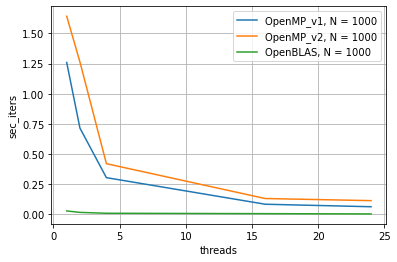

In [8]:
plt.plot(df_OpenMP_v1[df_OpenMP_v1.matrix_size == 1000].threads, \
         df_OpenMP_v1[df_OpenMP_v1.matrix_size == 1000].sec_iter, label = 'OpenMP_v1, N = 1000')
plt.plot(df_OpenMP_v2[df_OpenMP_v1.matrix_size == 1000].threads, \
         df_OpenMP_v2[df_OpenMP_v1.matrix_size == 1000].sec_iter, label = 'OpenMP_v2, N = 1000')
plt.plot(df_OpenBLAS[df_OpenMP_v1.matrix_size == 1000].threads, \
         df_OpenBLAS[df_OpenMP_v1.matrix_size == 1000].sec_iter, label = 'OpenBLAS, N = 1000')
plt.xlabel('threads')
plt.ylabel('sec_iters')
plt.grid()
plt.legend()

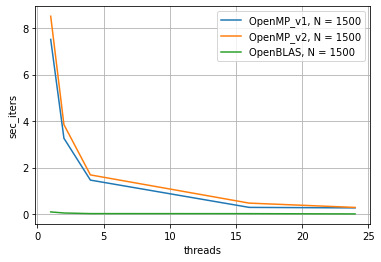

In [9]:
plt.plot(df_OpenMP_v1[df_OpenMP_v1.matrix_size == 1500].threads, \
         df_OpenMP_v1[df_OpenMP_v1.matrix_size == 1500].sec_iter, label = 'OpenMP_v1, N = 1500')
plt.plot(df_OpenMP_v2[df_OpenMP_v1.matrix_size == 1500].threads, \
         df_OpenMP_v2[df_OpenMP_v1.matrix_size == 1500].sec_iter, label = 'OpenMP_v2, N = 1500')
plt.plot(df_OpenBLAS[df_OpenMP_v1.matrix_size == 1500].threads, \
         df_OpenBLAS[df_OpenMP_v1.matrix_size == 1500].sec_iter, label = 'OpenBLAS, N = 1500')
plt.xlabel('threads')
plt.ylabel('sec_iters')
plt.grid()
plt.legend()

# Plots: Threads, GFLOPS

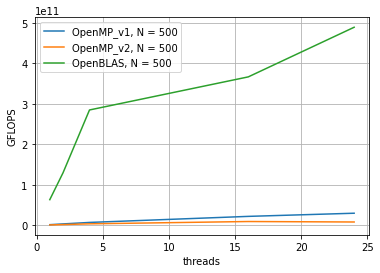

In [10]:
plt.plot(df_OpenMP_v1[df_OpenMP_v1.matrix_size == 500].threads, \
         df_OpenMP_v1[df_OpenMP_v1.matrix_size == 500].GFLOPS, label = 'OpenMP_v1, N = 500')
plt.plot(df_OpenMP_v2[df_OpenMP_v1.matrix_size == 500].threads, \
         df_OpenMP_v2[df_OpenMP_v1.matrix_size == 500].GFLOPS, label = 'OpenMP_v2, N = 500')
plt.plot(df_OpenBLAS[df_OpenMP_v1.matrix_size == 500].threads, \
         df_OpenBLAS[df_OpenMP_v1.matrix_size == 500].GFLOPS, label = 'OpenBLAS, N = 500')
plt.xlabel('threads')
plt.ylabel('GFLOPS')
plt.grid()
plt.legend()

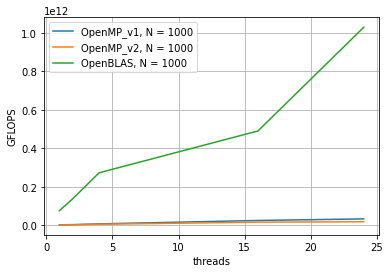

In [11]:
plt.plot(df_OpenMP_v1[df_OpenMP_v1.matrix_size == 1000].threads, \
         df_OpenMP_v1[df_OpenMP_v1.matrix_size == 1000].GFLOPS, label = 'OpenMP_v1, N = 1000')
plt.plot(df_OpenMP_v2[df_OpenMP_v1.matrix_size == 1000].threads, \
         df_OpenMP_v2[df_OpenMP_v1.matrix_size == 1000].GFLOPS, label = 'OpenMP_v2, N = 1000')
plt.plot(df_OpenBLAS[df_OpenMP_v1.matrix_size == 1000].threads, \
         df_OpenBLAS[df_OpenMP_v1.matrix_size == 1000].GFLOPS, label = 'OpenBLAS, N = 1000')
plt.xlabel('threads')
plt.ylabel('GFLOPS')
plt.grid()
plt.legend()

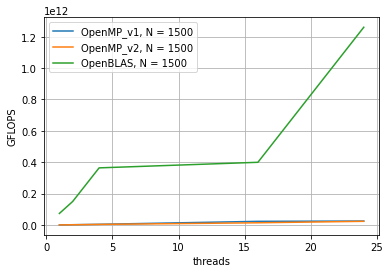

In [12]:
plt.plot(df_OpenMP_v1[df_OpenMP_v1.matrix_size == 1500].threads, \
         df_OpenMP_v1[df_OpenMP_v1.matrix_size == 1500].GFLOPS, label = 'OpenMP_v1, N = 1500')
plt.plot(df_OpenMP_v2[df_OpenMP_v1.matrix_size == 1500].threads, \
         df_OpenMP_v2[df_OpenMP_v1.matrix_size == 1500].GFLOPS, label = 'OpenMP_v2, N = 1500')
plt.plot(df_OpenBLAS[df_OpenMP_v1.matrix_size == 1500].threads, \
         df_OpenBLAS[df_OpenMP_v1.matrix_size == 1500].GFLOPS, label = 'OpenBLAS, N = 1500')
plt.xlabel('threads')
plt.ylabel('GFLOPS')
plt.grid()
plt.legend()